# Grid convergence tests for laminar solutions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from flowField import *
from flowFieldWavy import *
import h5py
import numpy as np
import pdb
import cProfile
import time
from pseudo import *
from scipy.linalg import norm, svd
from scipy.sparse.linalg import gmres, LinearOperator
from lgmresCustom import lgmres

import matplotlib.pyplot as plt
%matplotlib inline

## Test 1: Single geometry, non-adaptive grid, 9 grids (3 diff N, 3 diff n)
Using theta=0,
2g = 1.0, 2eps = 0.05, Re= 100
N = 30, 50, 70
n = 4, 6, 8

In [ ]:
#vfList1=[];pfList1=[];fnormList1=[];flgList1=[]
g=0.2; eps=0.001

for N in NArr:
    for n in nArr:
        start = time.time()
        vf, pf, fnorm, flg = runMATLAB(g=g,eps=eps,N=int(N),n=int(n),tol=1.0e-14)
        if fnorm[-1] > 1.0e-13: print('Run failed, residual norm is',fnorm)
        print('N,n:',vf.N,vf.nx//2)
        print('Run time:',(time.time()-start))
        print('****************************************')
        vfList1.append(vf); pfList1.append(pf); fnormList1.append(fnorm); flgList1.append(flg)

In [22]:
NArr = np.array([25,40,55,65])
#nArr = np.array([3,4,5,6,7])
nArr = np.array([9,11])



#vfList2=[];pfList2=[];fnormList2=[];flgList2=[]
g=0.2; eps=0.025

for N in NArr:
    for n in nArr:
        start = time.time()
        vf, pf, fnorm, flg = runMATLAB(g=g,eps=eps,N=int(N),n=int(n),tol=1.0e-14)
        if fnorm[-1] > 1.0e-13: print('Run failed, residual norm is',fnorm)
        print('N,n:',vf.N,vf.nx//2)
        print('Run time:',(time.time()-start))
        print('****************************************')
        vfList2.append(vf); pfList2.append(pf); fnormList2.append(fnorm); flgList2.append(flg)

N,n: 25 9
Run time: 100.51072692871094
****************************************
N,n: 25 11
Run time: 151.30838465690613
****************************************
N,n: 40 9
Run time: 217.01670742034912
****************************************
N,n: 40 11
Run time: 376.2056522369385
****************************************
N,n: 55 9
Run time: 509.92428493499756
****************************************
N,n: 55 11
Run time: 1054.9265468120575
****************************************
N,n: 65 9
Run time: 1133.0002546310425
****************************************
N,n: 65 11
Run time: 1849.4886507987976
****************************************


In [ ]:
NArr = np.array([25,40,55,65])
#nArr = np.array([3,4,5,6,7])
nArr = np.array([9,11])

#vfList3=[];pfList3=[];fnormList3=[];flgList3=[]
g=1.0; eps=0.001

for N in NArr:
    for n in nArr:
        start = time.time()
        vf, pf, fnorm, flg = runMATLAB(g=g,eps=eps,N=int(N),n=int(n),tol=1.0e-14)
        if fnorm[-1] > 1.0e-13: print('Run failed, residual norm is',fnorm)
        print('N,n:',vf.N,vf.nx//2)
        print('Run time:',(time.time()-start))
        print('****************************************')
        vfList3.append(vf); pfList3.append(pf); fnormList3.append(fnorm); flgList3.append(flg)

#vfList4=[];pfList4=[];fnormList4=[];flgList4=[]
g=0.5; eps=0.025

for N in NArr:
    for n in nArr:
        start = time.time()
        vf, pf, fnorm, flg = runMATLAB(g=g,eps=eps,N=int(N),n=int(n),tol=1.0e-14)
        if fnorm[-1] > 1.0e-13: print('Run failed, residual norm is',fnorm)
        print('N,n:',vf.N,vf.nx//2)
        print('time elapsed:',(time.time()-start))
        print('****************************************')
        vfList4.append(vf); pfList4.append(pf); fnormList4.append(fnorm); flgList4.append(flg)
        
        
NArr = np.array([25,40,55,65])
nArr = np.array([3,4,5,6,7,9,11])

vfList5=[];pfList5=[];fnormList5=[];flgList5=[]
g=0.5; eps=0.001

for N in NArr:
    for n in nArr:
        start = time.time()
        vf, pf, fnorm, flg = runMATLAB(g=g,eps=eps,N=int(N),n=int(n),tol=1.0e-14)
        if fnorm[-1] > 1.0e-13: print('Run failed, residual norm is',fnorm)
        print('N,n:',vf.N,vf.nx//2)
        print('time elapsed:',(time.time()-start))
        print('****************************************')
        vfList5.append(vf); pfList5.append(pf); fnormList5.append(fnorm); flgList5.append(flg)
        
vfList6=[];pfList6=[];fnormList6=[];flgList6=[]
g=1.0; eps=0.025

for N in NArr:
    for n in nArr:
        start = time.time()
        vf, pf, fnorm, flg = runMATLAB(g=g,eps=eps,N=int(N),n=int(n),tol=1.0e-14)
        if fnorm[-1] > 1.0e-13: print('Run failed, residual norm is',fnorm)
        print('N,n:',vf.N,vf.nx//2)
        print('time elapsed:',(time.time()-start))
        print('****************************************')
        vfList6.append(vf); pfList6.append(pf); fnormList6.append(fnorm); flgList6.append(flg)
        
vfList7=[];pfList7=[];fnormList7=[];flgList7=[]
g=0.5; eps=0.1

for N in NArr:
    for n in nArr:
        start = time.time()
        vf, pf, fnorm, flg = runMATLAB(g=g,eps=eps,N=int(N),n=int(n),tol=1.0e-14)
        if fnorm[-1] > 1.0e-13: print('Run failed, residual norm is',fnorm)
        print('N,n:',vf.N,vf.nx//2)
        print('time elapsed:',(time.time()-start))
        print('****************************************')
        vfList7.append(vf); pfList7.append(pf); fnormList7.append(fnorm); flgList7.append(flg)

        
        

65

In [ ]:
#Reordering all the lists so that n runs from 3 to 11 for each N
#   The first 20 objects are fine. I need to move objects 21 through 28
vfList1.insert(5,vfList1.pop(20)); vfList1.insert(6,vfList1.pop(21)) #N=25, n=9,11
vfList1.insert(12,vfList1.pop(22)); vfList1.insert(13,vfList1.pop(23)) #N=45, n=9,11
vfList1.insert(19,vfList1.pop(24)); vfList1.insert(20,vfList1.pop(25)) #N=55, n=9,11
# For N=65, the last two objects are properly ordered already

pfList1.insert(5,pfList1.pop(20)); pfList1.insert(6,pfList1.pop(21)) #N=25, n=9,11
pfList1.insert(12,pfList1.pop(22)); pfList1.insert(13,pfList1.pop(23)) #N=45, n=9,11
pfList1.insert(19,pfList1.pop(24)); pfList1.insert(20,pfList1.pop(25)) #N=55, n=9,11
# For N=65, the last two objects are properly ordered already

# Checking that the ordering is fine:
for k in range(len(vfList1)):
    vf = vfList1[k]; pf = pfList1[k]
    print('N,n,eps,g:',vf.N,vf.nx//2,vf.flowDict['eps'], vf.flowDict['eps']*vf.flowDict['alpha'])
    print('N,n,eps,g:',pf.N,pf.nx//2,pf.flowDict['eps'], pf.flowDict['eps']*pf.flowDict['alpha'])

In [ ]:
##################################

vfList2.insert(5,vfList2.pop(20)); vfList2.insert(6,vfList2.pop(21)) #N=25, n=9,11
vfList2.insert(12,vfList2.pop(22)); vfList2.insert(13,vfList2.pop(23)) #N=45, n=9,11
vfList2.insert(19,vfList2.pop(24)); vfList2.insert(20,vfList2.pop(25)) #N=55, n=9,11
# For N=65, the last two objects are properly ordered already

pfList2.insert(5,pfList2.pop(20)); pfList2.insert(6,pfList2.pop(21)) #N=25, n=9,11
pfList2.insert(12,pfList2.pop(22)); pfList2.insert(13,pfList2.pop(23)) #N=45, n=9,11
pfList2.insert(19,pfList2.pop(24)); pfList2.insert(20,pfList2.pop(25)) #N=55, n=9,11
# For N=65, the last two objects are properly ordered already
# Checking that the ordering is fine:
for k in range(len(vfList2)):
    vf = vfList2[k]; pf = pfList2[k]
    print('N,n,eps,g:',vf.N,vf.nx//2,vf.flowDict['eps'], vf.flowDict['eps']*vf.flowDict['alpha'])
    print('N,n,eps,g:',pf.N,pf.nx//2,pf.flowDict['eps'], pf.flowDict['eps']*pf.flowDict['alpha'])

In [ ]:






##########################################

vfList3.insert(5,vfList3.pop(20)); vfList3.insert(6,vfList3.pop(21)) #N=25, n=9,11
vfList3.insert(12,vfList3.pop(22)); vfList3.insert(13,vfList3.pop(23)) #N=45, n=9,11
vfList3.insert(19,vfList3.pop(24)); vfList3.insert(20,vfList3.pop(25)) #N=55, n=9,11
# For N=65, the last two objects are properly ordered already

pfList3.insert(5,pfList3.pop(20)); pfList3.insert(6,pfList3.pop(21)) #N=25, n=9,11
pfList3.insert(12,pfList3.pop(22)); pfList3.insert(13,pfList3.pop(23)) #N=45, n=9,11
pfList3.insert(19,pfList3.pop(24)); pfList3.insert(20,pfList3.pop(25)) #N=55, n=9,11
# For N=65, the last two objects are properly ordered already

# Checking that the ordering is fine:
for k in range(len(vfList1)):
    vf = vfList3[k]; pf = pfList3[k]
    print('N,n,eps,g:',vf.N,vf.nx//2,vf.flowDict['eps'], vf.flowDict['eps']*vf.flowDict['alpha'])
    print('N,n,eps,g:',pf.N,pf.nx//2,pf.flowDict['eps'], pf.flowDict['eps']*pf.flowDict['alpha'])


##########################################

vfList4.insert(5,vfList4.pop(20)); vfList4.insert(6,vfList4.pop(21)) #N=25, n=9,11
vfList4.insert(12,vfList4.pop(22)); vfList4.insert(13,vfList4.pop(23)) #N=45, n=9,11
vfList4.insert(19,vfList4.pop(24)); vfList4.insert(20,vfList4.pop(25)) #N=55, n=9,11
# For N=65, the last two objects are properly ordered already

pfList4.insert(5,pfList4.pop(20)); pfList4.insert(6,pfList4.pop(21)) #N=25, n=9,11
pfList4.insert(12,pfList4.pop(22)); pfList4.insert(13,pfList4.pop(23)) #N=45, n=9,11
pfList4.insert(19,pfList4.pop(24)); pfList4.insert(20,pfList4.pop(25)) #N=55, n=9,11
# For N=65, the last two objects are properly ordered already

# Checking that the ordering is fine:
for k in range(len(vfList1)):
    vf = vfList4[k]; pf = pfList4[k]
    print('N,n,eps,g:',vf.N,vf.nx//2,vf.flowDict['eps'], vf.flowDict['eps']*vf.flowDict['alpha'])
    print('N,n,eps,g:',pf.N,pf.nx//2,pf.flowDict['eps'], pf.flowDict['eps']*pf.flowDict['alpha'])



# Function that returns index of 



In [ ]:
vfList=vfList1; pfList=pfList1
for k in range(len(vfList)):
    vf = vfList[k]; pf=pfList[k]
    vf = vf.slice(L=vf.nx//2+2); pf = pf.slice(L=pf.nx//2+2)
    #vf.view4d()[0,vf.nx//2,0,0]+= 1.-vf.y**2
    print( (vf.residuals(pField=pf)).slice(L=vf.nx//2-2).norm() )

In [ ]:
# Distance of solutions, from the best resolved solution. 
#    High res solutions are sliced down to match low res (i.e., energy in higher modes is ignored)
vEnd = vfList[-1]; pEnd = pfList[-1]
Lmax = vEnd.nx//2; Nmax = vEnd.N 
for k in range(len(vfList)-1):
    vf = vfList[k]; pf=pfList[k]
    #vf = vf.slice(L=Lmax,N=Nmax); pf = pf.slice(L=Lmax, N=Nmax)
    vEslice = vEnd.slice(L=vf.nx//2,N=vf.N); pEslice=pEnd.slice(L=vf.nx//2,N=vf.N)
    print(vf.nx//2,vf.N, (vf.getScalar(nd=1)-vEslice.getScalar(nd=1)).norm(), (pf-pEslice).norm() )

In [ ]:
# Distance of solutions, from the best resolved solution. 
#    Low res solutions are sliced up to match high res (i.e., padded with zeros for higher energy modes)
vEnd = vfList[-1]; pEnd = pfList[-1]
Lmax = vEnd.nx//2; Nmax = vEnd.N 
for k in range(len(vfList)-1):
    vf = vfList[k]; pf=pfList[k]
    L = vf.nx//2; N=vf.N
    vf = vf.slice(L=Lmax,N=Nmax); pf = pf.slice(L=Lmax, N=Nmax)
    print(L,N, (vf-vEnd).norm(), (pf-pEnd).norm() )

In [16]:
fluxEnd = vEnd.flux()
print(fluxEnd)
for k in range(len(vfList)-1):
    vf = vfList[k]
    print(vf.nx//2, vf.N, fluxEnd-vf.flux())
    

0.6652345303385676
3 25 0.000348083233397
4 25 0.000348082941642
5 25 0.000348082941056
6 25 0.000348082941052
7 25 0.000348082941055
9 25 0.000348082941054
11 25 0.000348082941054
3 40 -9.43429658773e-06
4 40 -9.44552249316e-06
5 40 -9.44555186944e-06
6 40 -9.44555192761e-06
7 40 -9.44555192528e-06
9 40 -9.44555192817e-06
11 40 -9.44555192939e-06
3 55 -1.35645176269e-06
4 55 -1.37847330195e-06
5 55 -1.37902732866e-06
6 55 -1.37902962627e-06
7 55 -1.3790296286e-06
9 55 -1.37902963604e-06
11 55 -1.37902963071e-06
3 65 3.66653121198e-08
4 65 1.16486420509e-09
5 65 1.29498634038e-11
6 65 1.19237952845e-13
7 65 1.23234755733e-14
9 65 -1.99840144433e-15


In [48]:
vfList=vfList7; pfList=pfList7
print(2.*vfList[0].flowDict['eps'], 2.*vfList[0].flowDict['eps']*vfList[0].flowDict['alpha'])
for k in range(len(vfList)):
    vf = vfList[k]; pf=pfList[k]
    vf = vf.slice(L=vf.nx//2+2); pf = pf.slice(L=pf.nx//2+2)
    #vf.view4d()[0,vf.nx//2,0,0]+= 1.-vf.y**2
    print( (vf.residuals(pField=pf)).slice(L=vf.nx//2-2).norm() )

0.2 1.0
5.00278439219e-16
5.32688375262e-16
5.54086549319e-16
4.91172117566e-16
4.93339383147e-16
5.13812914783e-16
5.78130401139e-16
1.31082483639e-15
1.45021127995e-15
1.40267280735e-15
1.35932650027e-15
1.41932130326e-15
1.48001100425e-15
1.63012633252e-15
2.95530143552e-15
2.96025714459e-15
2.7536099858e-15
2.90649313389e-15
2.93309007906e-15
2.63915183012e-15
2.75288962851e-15
3.93608954115e-15
4.11632747933e-15
4.00154525638e-15
4.11393838547e-15
4.00861150021e-15
3.74414132525e-15
4.21501135798e-15


In [49]:
# Distance of solutions, from the best resolved solution. 
#    High res solutions are sliced down to match low res (i.e., energy in higher modes is ignored)
vEnd = vfList[-1]; pEnd = pfList[-1]
Lmax = vEnd.nx//2; Nmax = vEnd.N 
for k in range(len(vfList)-1):
    vf = vfList[k]; pf=pfList[k]
    #vf = vf.slice(L=Lmax,N=Nmax); pf = pf.slice(L=Lmax, N=Nmax)
    vEslice = vEnd.slice(L=vf.nx//2,N=vf.N); pEslice=pEnd.slice(L=vf.nx//2,N=vf.N)
    print(vf.nx//2,vf.N, (vf.getScalar(nd=1)-vEslice.getScalar(nd=1)).norm(), (pf-pEslice).norm() )

3 25 0.000504441231631 0.000236410386028
4 25 0.000161120869363 0.000102876693554
5 25 5.38529005501e-05 4.52368198696e-05
6 25 1.84184653182e-05 2.49898494908e-05
7 25 6.17543264125e-06 1.99667267347e-05
9 25 1.99113644126e-06 1.89435252606e-05
11 25 1.73321009781e-06 1.89527665836e-05
3 40 0.000504446352329 0.000235605044869
4 40 0.000161236148471 0.000101488755031
5 40 5.39751777656e-05 4.15841655869e-05
6 40 1.85597961493e-05 1.73876791082e-05
7 40 6.42286913109e-06 8.77998260689e-06
9 40 7.72670384101e-07 5.97168903568e-06
11 40 3.12510844141e-10 5.88037254847e-06
3 55 0.00050444635189 0.000235690309899
4 55 0.000161236147431 0.000101687911436
5 55 5.39751884176e-05 4.20334363855e-05
6 55 1.85600252871e-05 1.84449807177e-05
7 55 6.42361361108e-06 1.07189420615e-05
9 55 7.73306594848e-07 8.57089076847e-06
11 55 5.49924923158e-14 8.50747677327e-06
3 65 0.00050444635189 0.000235517720646
4 65 0.00016123614743 0.000101351280169
5 65 5.3975188414e-05 4.1165268632e-05
6 65 1.85600253166

In [50]:
# Distance of solutions, from the best resolved solution. 
#    Low res solutions are sliced up to match high res (i.e., padded with zeros for higher energy modes)
vEnd = vfList[-1]; pEnd = pfList[-1]
Lmax = vEnd.nx//2; Nmax = vEnd.N 
for k in range(len(vfList)-1):
    vf = vfList[k]; pf=pfList[k]
    L = vf.nx//2; N=vf.N
    vf = vf.slice(L=Lmax,N=Nmax); pf = pf.slice(L=Lmax, N=Nmax)
    print(L,N, (vf-vEnd).norm(), (pf-pEnd).norm() )

3 25 0.00240153161401 0.00037648123997
4 25 0.000755337486701 0.000139736720017
5 25 0.00025998154321 5.45143985699e-05
6 25 9.24525052644e-05 2.53778844343e-05
7 25 3.34465354596e-05 1.75624368474e-05
9 25 6.7324256286e-06 1.58787846048e-05
11 25 5.46743093473e-06 1.58614710361e-05
3 40 0.00240155778556 0.000376161909908
4 40 0.000755356997417 0.000139130217872
5 40 0.000259984336117 5.27065053441e-05
6 40 9.23789125497e-05 2.11498295291e-05
7 40 3.30790420547e-05 1.0590268705e-05
9 40 4.23690779996e-06 7.38279234048e-06
11 40 1.30525372635e-09 7.27916781982e-06
3 55 0.00240155779439 0.000376170542527
4 55 0.000755356999416 0.000139189886078
5 55 0.00025998433532 5.28259402476e-05
6 55 9.23789118805e-05 2.14389595771e-05
7 55 3.30790411287e-05 1.11491742525e-05
9 55 4.23690769701e-06 8.16283317196e-06
11 55 1.96242055722e-13 8.0691737062e-06
3 65 0.00240155779438 0.000376076157827
4 65 0.00075535699941 0.000138966628177
5 65 0.000259984335317 5.22075711599e-05
6 65 9.23789118791e-05 1

In [43]:
fluxEnd = vEnd.flux()
print(fluxEnd)
for k in range(len(vfList)-1):
    vf = vfList[k]
    print(vf.nx//2, vf.N, fluxEnd-vf.flux())

0.6622942099845445
3 25 0.0146808775429
4 25 0.0146807496822
5 25 0.0146807495097
6 25 0.0146807495097
7 25 0.0146807495097
9 25 0.0146807495097
11 25 0.0146807495097
3 40 0.00372541071389
4 40 0.00372249856505
5 40 0.00372248724253
6 40 0.00372248722288
7 40 0.00372248722287
9 40 0.00372248722286
11 40 0.00372248722286
3 55 0.000728358757718
4 55 0.000715603278046
5 55 0.000715301743835
6 55 0.00071530062019
7 55 0.000715300617576
9 55 0.000715300617553
11 55 0.000715300617572
3 65 1.76368976375e-05
4 65 1.14983768229e-06
5 65 1.07534414706e-08
6 65 5.29800647797e-11
7 65 1.47326595368e-13
9 65 2.17603712827e-14


In [51]:
runMATLAB?

In [78]:
vAsymp,pAsymp,fnrm,flg = runMATLAB(eps=0.01,g=0.0001,Re=5.,theta=0,N=11,n=3,tol=1.0e-14)

In [82]:
vf = vAsymp.slice(L=1)
u = vf.getScalar(); v=vf.getScalar(nd=1)


In [86]:
v[0,0,0,0] /(v.y**2-1.)

/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


flowFieldWavy([             inf            +infj,
        -1.21613876e-12 +9.99998368e-05j,
        -4.47112692e-12 +9.99994202e-05j,
        -8.59432761e-12 +9.99989051e-05j,
        -1.19883824e-11 +9.99984885e-05j,
        -1.32942774e-11 +9.99983293e-05j,
        -1.19883824e-11 +9.99984885e-05j,
        -8.59432761e-12 +9.99989051e-05j,
        -4.47112692e-12 +9.99994202e-05j,
        -1.21613876e-12 +9.99998368e-05j,             -inf            -infj])

In [87]:
v.flowDict['eps']

0.01

In [81]:
v[0,1,0,0]

flowFieldWavy([ -6.65192850e-24 +5.91736066e-24j,
        -9.30558580e-14 -7.12960711e-24j,
        -2.92072043e-13 -3.77809462e-23j,
        -4.09548550e-13 +6.41415914e-23j,
        -3.00749554e-13 -1.07207957e-22j,
        -6.26241904e-25 +1.07987810e-22j,
         3.00749554e-13 -1.06881368e-22j,
         4.09548550e-13 +6.19125207e-23j,
         2.92072043e-13 -3.62175612e-23j,
         9.30558580e-14 -8.45905442e-24j,  -7.79905247e-24 +3.21697662e-24j])

In [80]:
Q1 = 2.*vf.flux()*3./4.
M = 1.+3.*Q1/4.; Re= vf.flowDict['Re'] ; H= 2.*M/Re; a = vf.flowDict['alpha']; A = 2.*vf.flowDict['eps']

In [61]:
X = 2.*np.pi/a*np.arange(0.,2.*np.pi, np.pi/10.)
X = X.reshape((X.size,1))
XI = a*X
Y = vf.y.reshape((1,vf.N))

In [64]:
U = np.zeros((X.size,Y.size),dtype=np.complex)
for lp in range(u.nx):
    l=lp-u.nx//2
    U += u[0,lp:lp+1,0,0]*np.exp(1.j*l*a*X)

    

In [67]:
Y = np.tile(Y,(X.size,1))
X = np.tile(X,(1,vf.N))

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


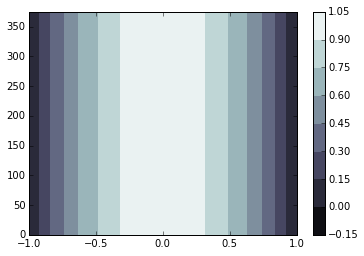

In [71]:
plt.contourf(Y,X,np.real(U),cmap=plt.cm.bone)
plt.colorbar()

In [72]:
u[0,1,0,0] - (1.-u.y**2)

flowFieldWavy([ -9.78909153e-22 -1.33378516e-21j,
        -3.82558060e-07 -1.31039687e-21j,
        -1.38367598e-06 -1.23360183e-21j,
        -2.62026210e-06 -1.14518224e-21j,
        -3.61998315e-06 -1.29046726e-21j,
        -4.00167795e-06 -1.60503329e-21j,
        -3.61998315e-06 -1.27730285e-21j,
        -2.62026210e-06 -9.10931239e-22j,
        -1.38367598e-06 -1.05689410e-23j,
        -3.82558060e-07 +5.76796514e-22j,   7.93544946e-22 +7.50060454e-22j])

In [74]:
XI = a*X
uAn = 0.5*Re*M*M*A*np.sin(XI)*( 1.-A*np.cos(XI)/2.)**-1 

In [75]:
uAn = uAn* (-Y**6/30. + Y**4/6. - Y**2*11./70. + 5./210.)
uAn += M*(1.-A*np.cos(XI)/2)**-1 * (1.-Y**2)

In [76]:
U.shape, uAn.shape

((20, 11), (20, 11))

In [77]:
U-uAn

array([[ -1.21889129e-21 -2.85759949e-21j,
         -7.33188275e-02 -1.15408239e-20j,
         -2.65263457e-01 -2.98579114e-20j,
         -5.02502976e-01 -7.15742840e-20j,
         -6.94408367e-01 -5.56924163e-20j,
         -7.67677737e-01 +1.24343537e-20j,
         -6.94333706e-01 +4.61632956e-20j,
         -5.02400230e-01 +2.54109884e-20j,
         -2.65188815e-01 +1.48230766e-20j,
         -7.32945749e-02 +3.91752738e-21j,
         -9.49865072e-22 +1.04033397e-21j],
       [ -1.96689125e-21 -1.24079372e-21j,
         -7.00287179e-02 +2.79520873e-19j,
         -2.54355262e-01 +9.24959978e-19j,
         -4.84704044e-01 -1.40268656e-18j,
         -6.73623876e-01 +2.38185665e-18j,
         -7.46503153e-01 -2.54963673e-18j,
         -6.73658673e-01 +2.29037709e-18j,
         -4.84751854e-01 -1.50771865e-18j,
         -2.54389897e-01 +8.60585474e-19j,
         -7.00399382e-02 +2.66815378e-19j,
          2.19545161e-21 +2.08249583e-21j],
       [  3.62325621e-23 +1.17069134e-22j,
         